## Different Models Stocks - Predicting Close Value from Open

In [4]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23907 sha256=62ba0258d8b41b84a226d64549a7b53387ef4c8a8eda2a9cec18f1da8ac97dff
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/ec/cc/c1/32da8ee853d742d5d7cbd11ee04421222eb354672020b57297
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8367 sha256=05224ab101d95b315bde9ec6fde891b85e5fcc9a750fb4aecd7a42b66a0b5d01
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/57/6d/a3/a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [7]:
# The code was removed by Watson Studio for sharing.

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-08,1533.510010,1563.864990,1528.010010,1532.390015,1532.390015,2610900
1,2020-09-09,1557.530029,1569.000000,1536.051025,1556.959961,1556.959961,1774700
2,2020-09-10,1560.640015,1584.081055,1525.805054,1532.020020,1532.020020,1618600
3,2020-09-11,1536.000000,1575.199951,1497.359985,1520.719971,1520.719971,1597100
4,2020-09-14,1539.005005,1564.000000,1515.739990,1519.280029,1519.280029,1696600


In [8]:
df = df_data_1

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-08,1533.510010,1563.864990,1528.010010,1532.390015,1532.390015,2610900
1,2020-09-09,1557.530029,1569.000000,1536.051025,1556.959961,1556.959961,1774700
2,2020-09-10,1560.640015,1584.081055,1525.805054,1532.020020,1532.020020,1618600
3,2020-09-11,1536.000000,1575.199951,1497.359985,1520.719971,1520.719971,1597100
4,2020-09-14,1539.005005,1564.000000,1515.739990,1519.280029,1519.280029,1696600


In [10]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
df.value_counts()

Date        Open         High         Low          Close        Adj Close    Volume 
2020-09-08  1533.510010  1563.864990  1528.010010  1532.390015  1532.390015  2610900    1
2021-05-14  2291.830078  2321.139893  2283.320068  2316.159912  2316.159912  1331200    1
2021-04-27  2336.000000  2337.449951  2304.270020  2307.120117  2307.120117  1598600    1
2021-04-28  2407.145020  2452.377930  2374.850098  2379.909912  2379.909912  2986400    1
2021-04-29  2410.330078  2436.520020  2402.280029  2429.889893  2429.889893  1977700    1
                                                                                       ..
2021-01-13  1738.579956  1765.035034  1738.010010  1754.400024  1754.400024  1094100    1
2021-01-14  1753.619995  1775.010010  1733.400024  1740.180054  1740.180054  1179500    1
2021-01-15  1738.189941  1756.000000  1721.550049  1736.189941  1736.189941  1342200    1
2021-01-19  1752.250000  1809.275024  1741.459961  1790.859985  1790.859985  1734600    1
2021-09-03  288

In [13]:
df["Date"] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-08,1533.510010,1563.864990,1528.010010,1532.390015,1532.390015,2610900
1,2020-09-09,1557.530029,1569.000000,1536.051025,1556.959961,1556.959961,1774700
2,2020-09-10,1560.640015,1584.081055,1525.805054,1532.020020,1532.020020,1618600
3,2020-09-11,1536.000000,1575.199951,1497.359985,1520.719971,1520.719971,1597100
4,2020-09-14,1539.005005,1564.000000,1515.739990,1519.280029,1519.280029,1696600


## Data Visualisation

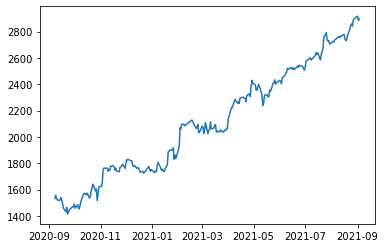

In [16]:
plt.plot(df['Date'],df['Close'])

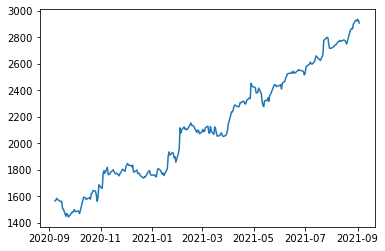

In [17]:
plt.plot(df['Date'],df['High'])

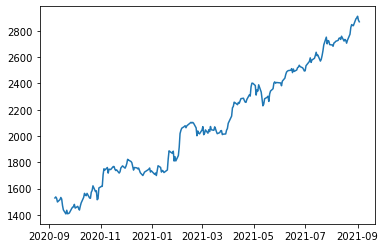

In [18]:
plt.plot(df['Date'],df['Low'])

In [19]:
!pip install mpl_finance

In [21]:
!pip install --upgrade mplfinance

     |████████████████████████████████| 62 kB 1.6 MB/s  eta 0:00:01


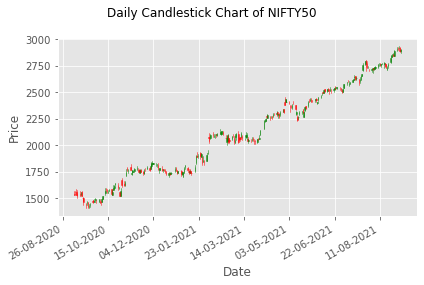

In [23]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mpl_dates

plt.style.use('ggplot')

# Extracting Data for plotting
ohlc = df
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of NIFTY50')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

plt.show()


## Data Splitting

In [36]:
X = np.asanyarray(df[['Open']])
y = np.asanyarray(df['Close'])

In [27]:
!pip install scikit-learn

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

### Using Different Machine Learning Models

### 1. Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
lre = LinearRegression()
lre.fit(x_train,y_train)
y_preds = lre.predict(x_test)
print("Y preds: ", y_preds[:5])
print("Y test: ", y_test[:5])

Y preds:  [1626.93291478 2652.66910816 1629.02668955 1556.27859807 1923.94601513]
Y test:  [1641.       2625.330078 1626.030029 1520.900024 1927.51001 ]


###  2. Polynomial Regression

In [41]:
from sklearn.preprocessing import PolynomialFeatures